In [2]:
import dask.array as da
import numpy as np
import pandas as pd

In [3]:
# The big dataset 

In [4]:
n_rows = 10000
n_cols = 10000
a = np.random.randint(low=0, high=20, size=(n_rows,n_cols), dtype=np.int64)
df = pd.DataFrame(a)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,18,19,6,17,11,7,11,11,19,4,...,1,17,1,6,8,14,12,7,3,10
1,6,4,16,16,17,14,15,10,19,19,...,4,15,8,14,13,19,12,5,9,0
2,9,11,14,10,0,10,17,10,9,7,...,6,12,13,9,14,7,0,3,2,10
3,7,11,13,2,18,13,17,8,12,4,...,2,5,14,17,2,3,19,2,4,5
4,10,8,2,15,14,5,6,12,6,11,...,18,7,2,2,1,10,14,5,10,16


In [5]:
# split the dataset into chunks (to calcualte on)
dask_array = da.from_array(a, chunks=(100,100))

In [6]:
dask_array

dask.array<array, shape=(10000, 10000), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [12]:
dask_array.sum().dask

HighLevelGraph with 9 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x175f73c40>
 0. array-1cd29d1bd9a880e65894981efcc072f7
 1. sum-da6d19407c5a9b4b8e042acbf59b36c3
 2. sum-partial-2522dcb7395273d333165105d66c4cc2
 3. sum-partial-23a9d0d4104fef4a0488972ab18694fa
 4. sum-partial-7405abe930b39bb49caaa8e59baddfcf
 5. sum-partial-5d3bb867c652e86a3bbcc646ef6e9826
 6. sum-partial-a582007e623850be46942484d1ad1bb0
 7. sum-partial-30f9c0780c2e52444909189b5074783b
 8. sum-aggregate-ea250a1e02ca01b1959b318e421c5a17

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.030844 to fit


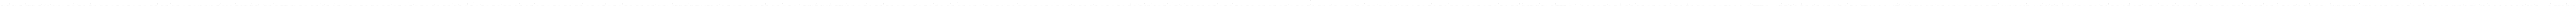

In [14]:
dask_array.sum().visualize(engine = "graphviz")

In [13]:
%%time
dask_array.sum().compute()

CPU times: user 1.26 s, sys: 228 ms, total: 1.48 s
Wall time: 1.39 s


949919030